In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import skimage.io as io
from skimage import color
from skimage.util import view_as_blocks, view_as_windows
from skimage.transform import resize, rescale


from PIL import Image

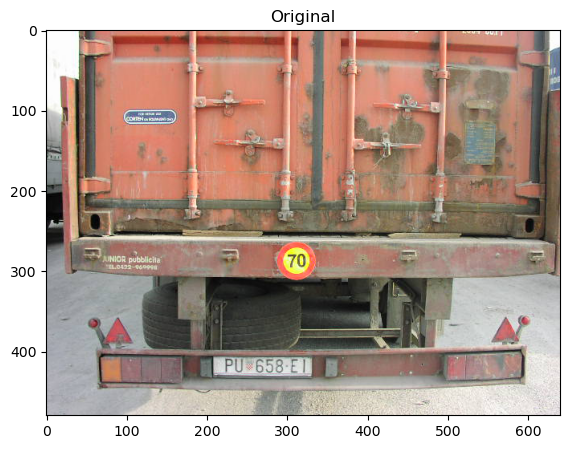

In [27]:
# Carico l'immagine
img = np.array(Image.open("dataset/P5280010.jpg"))
plt.figure(figsize=(15,5))
plt.imshow(img)
plt.title('Original')
plt.show()

Text(0.5, 1.0, 'Immagine Interpolata')

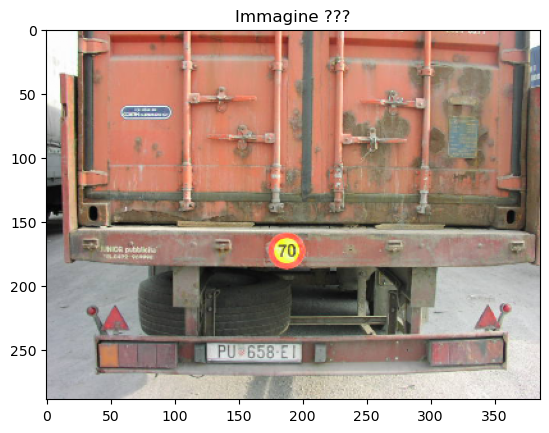

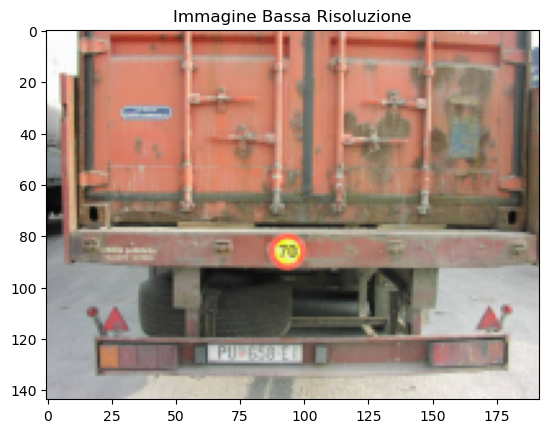

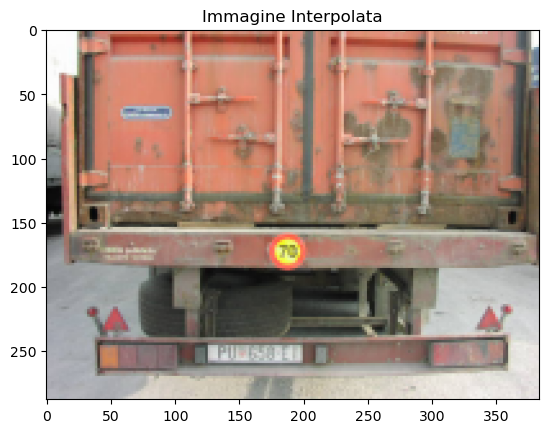

In [ ]:
# Implementazione con window
windowShape = (96,96,3)
step = 24
scale = 2

# Ridimensioniamo i blocchi
def dowscale_blocks(blocks):
    blocksRes = []
    for i in range(blocks.shape[0]):
        row = []
        for j in range(blocks.shape[1]):
            blockLow = rescale(blocks[i][j], (1/scale,1/scale,1), anti_aliasing=None)
            row.append(blockLow)
        blocksRes.append(row)    
    return np.array(blocksRes)*255



def reconstruct_img(blocks, step):
    """
    Ricostruisce un'immagine RGB da blocchi ridimensionati sovrapposti.
    Applica media nelle regioni sovrapposte.
    blocks: (n_rows, n_cols, h, w, 3)
    step: (step_y, step_x) – distanza tra blocchi nella scala ridotta
    """
    n_rows, n_cols, h, w, c = blocks.shape
    H = (n_rows - 1) * step[0] + h
    W = (n_cols - 1) * step[1] + w

    canvas = np.zeros((H, W, c), dtype=np.float64)
    weight = np.zeros((H, W, c), dtype=np.float64)

    for i in range(n_rows):
        for j in range(n_cols):
            top = i * step[0]
            left = j * step[1]
            canvas[top:top+h, left:left+w, :] += blocks[i, j]
            weight[top:top+h, left:left+w, :] += 1

    return (canvas / np.maximum(weight, 1)).astype(np.uint8)


plt.figure();
plt.imshow(img2)
plt.title("Immagine ???")


blocks = view_as_windows(img2, windowShape, step).squeeze()
blocksRes = dowscale_blocks(blocks)
imgLow = reconstruct_img(blocksRes, (int(step/scale),int(step/scale)))

plt.figure();
plt.imshow(imgLow)
plt.title("Immagine Bassa Risoluzione")

imgIn = rescale(imgLow, scale=(2,2,1), order=0, anti_aliasing=None)
plt.figure();
plt.imshow(imgIn)
plt.title("Immagine Interpolata")
